# Setup

In [3]:
import locale
locale.setlocale(locale.LC_ALL, 'sv_SE')

%matplotlib inline
from pprint import pprint

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn

seaborn.set_theme()
seaborn.set_style('ticks')
seaborn.despine()

matplotlib.rcParams['figure.dpi'] = 300

<Figure size 432x288 with 0 Axes>

# A-tax vs gross monthly salary

A simple plot of the tax deduction (per month) as a function of gross monthly salary.

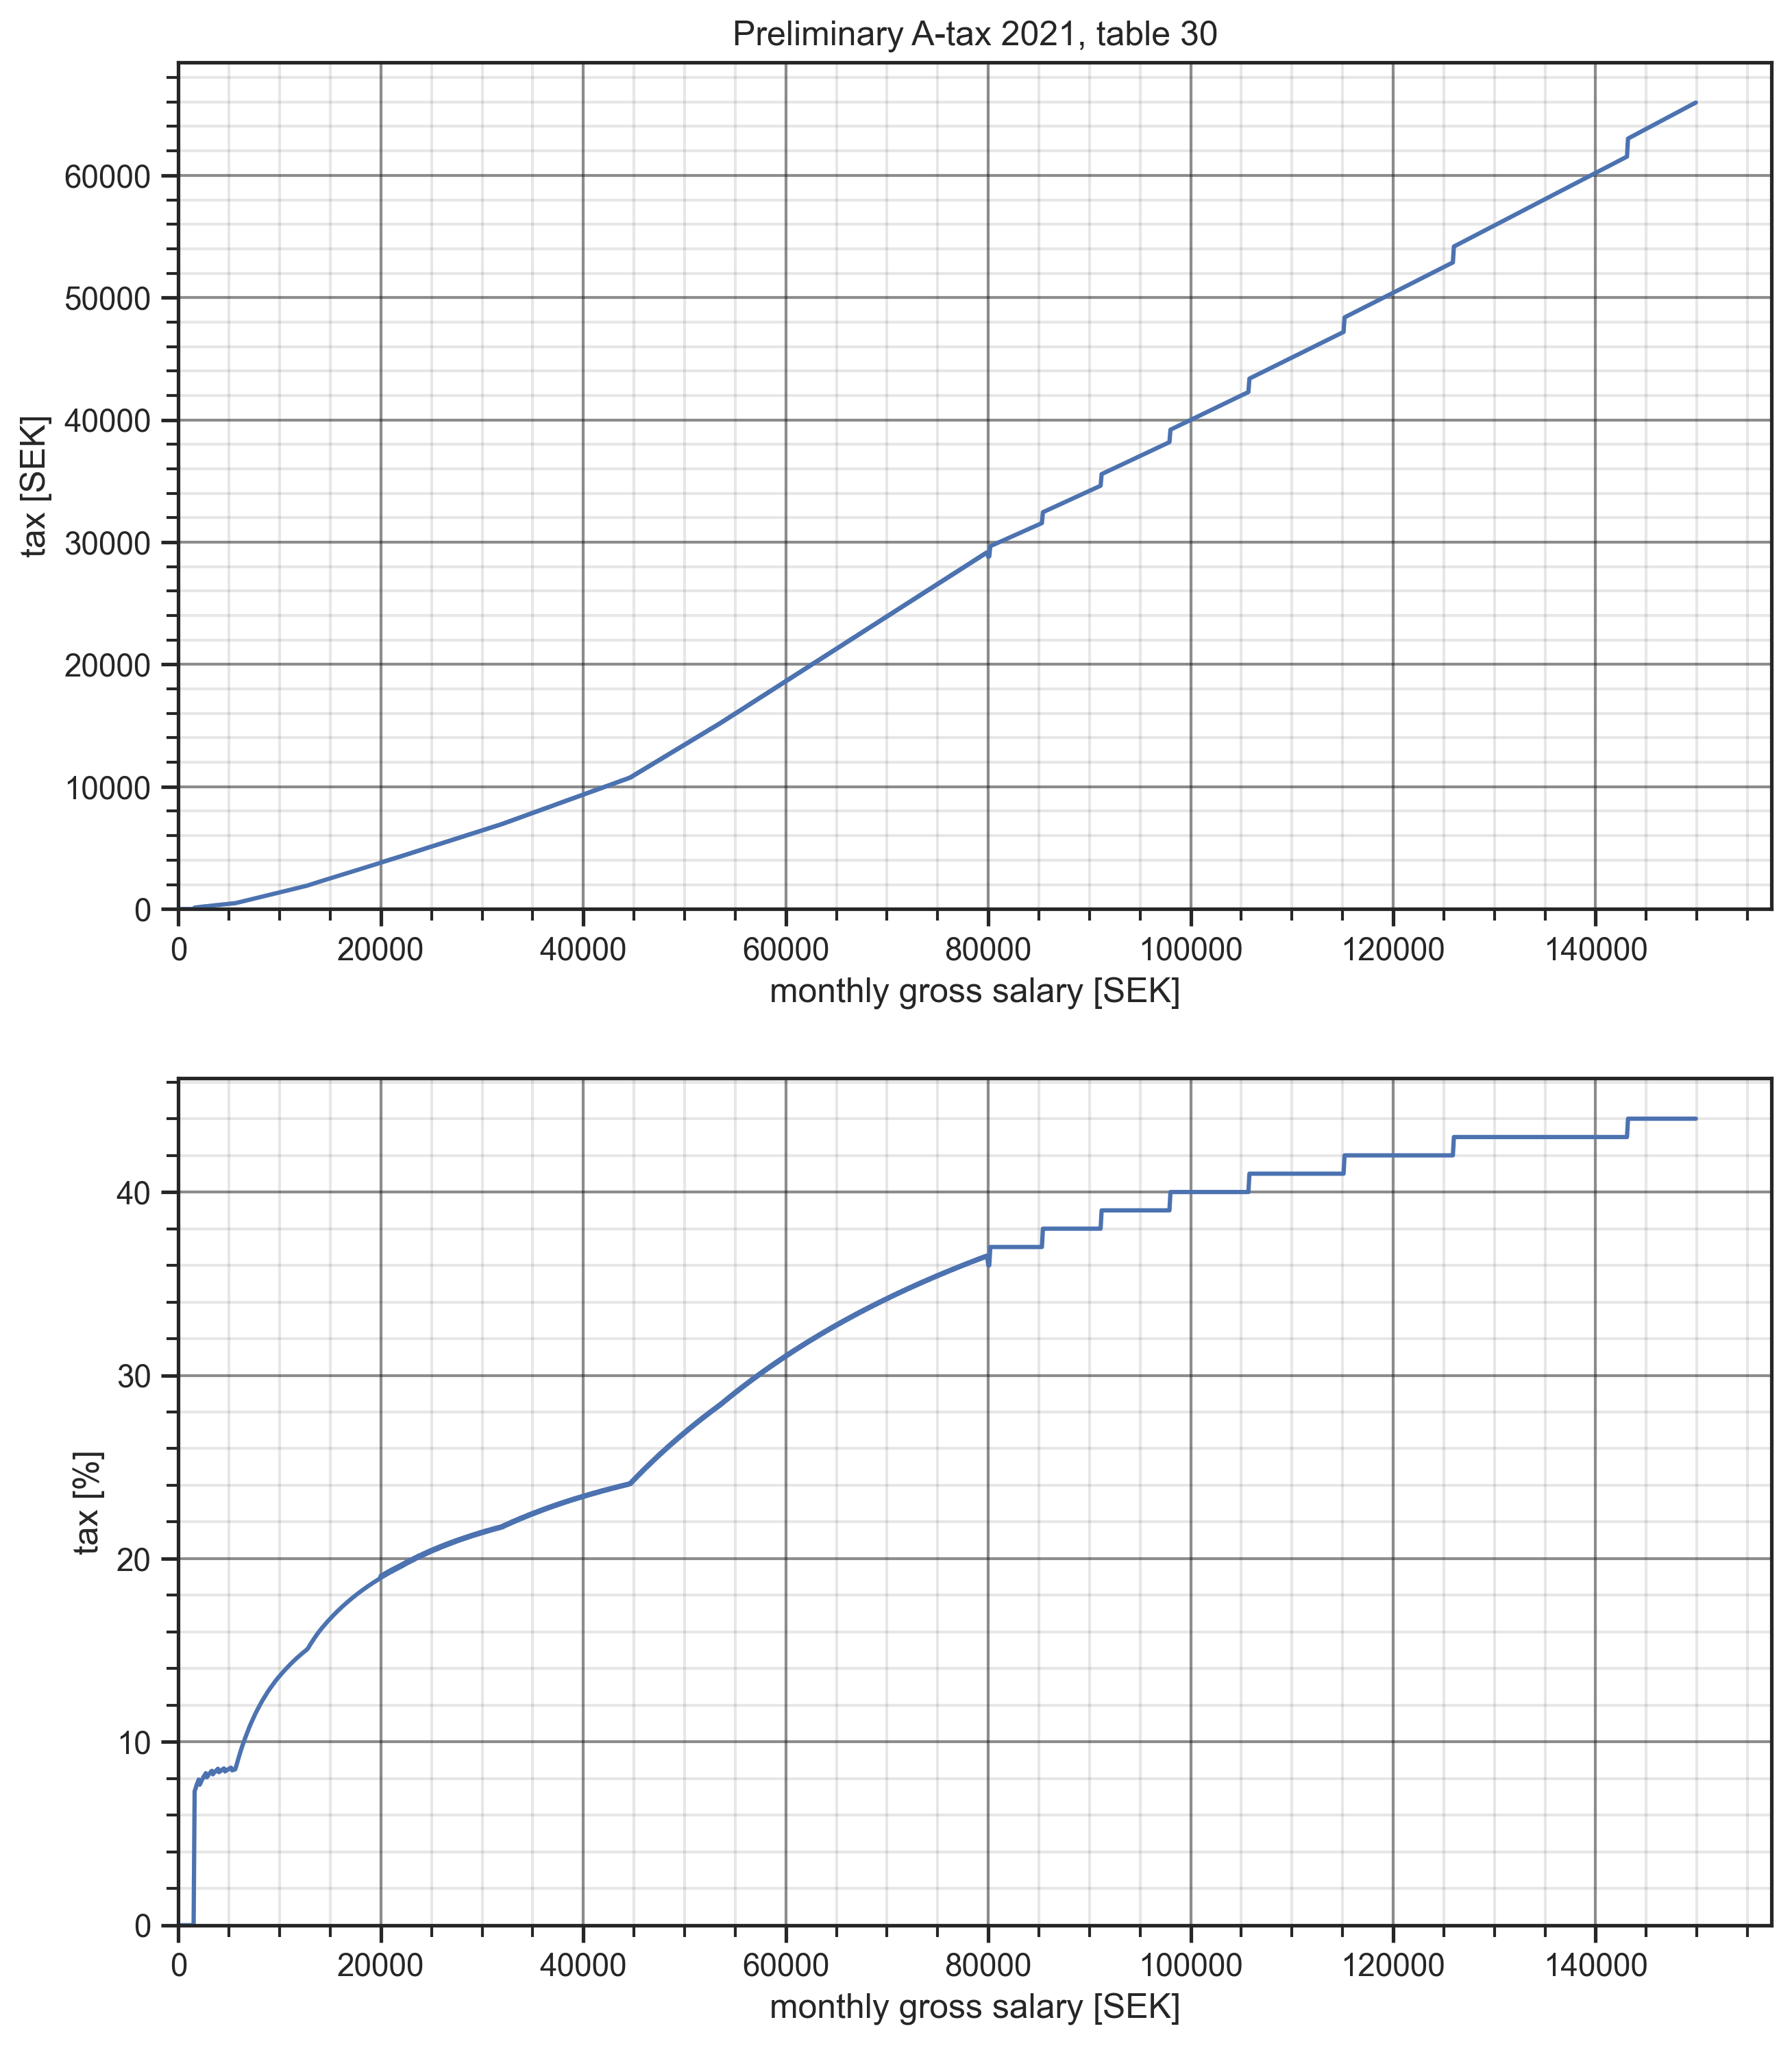

In [4]:
from atax import ATax
TAX_TABLE_NO = 30
monthly_salary = range(1, 150000, 100)
atax_table = ATax(TAX_TABLE_NO)
atax = [atax_table.get(s) for s in monthly_salary]
atax_ratio = [atax_table.get(s) * 100.0 / s for s in monthly_salary]

plt.figure(figsize=(10, 12), facecolor='white')

plt.subplot(2,1,1)
plt.plot(monthly_salary, atax)
plt.title(f'Preliminary A-tax 2021, table {TAX_TABLE_NO}')
plt.xlabel('monthly gross salary [SEK]')
plt.ylabel('tax [SEK]')
plt.gca().set_ylim(ymin=0)
plt.gca().set_xlim(xmin=0)
plt.grid(visible=True, which='major', color='k', linestyle='-', alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.minorticks_on()

plt.subplot(2,1,2)
plt.plot(monthly_salary, atax_ratio)
plt.xlabel('monthly gross salary [SEK]')
plt.ylabel('tax [%]')
plt.gca().set_ylim(ymin=0)
plt.gca().set_xlim(xmin=0)
plt.grid(visible=True, which='major', color='k', linestyle='-', alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.minorticks_on()


## Plot using salary boundaries from raw data

Plot the A-tax at each boundary limit defined in the raw tax table data. Compared to plotting the A-tax at, say, every 100 kr interval, this should produce something that looks very similar, perhaps with fewer visual artifacts caused by sampling.

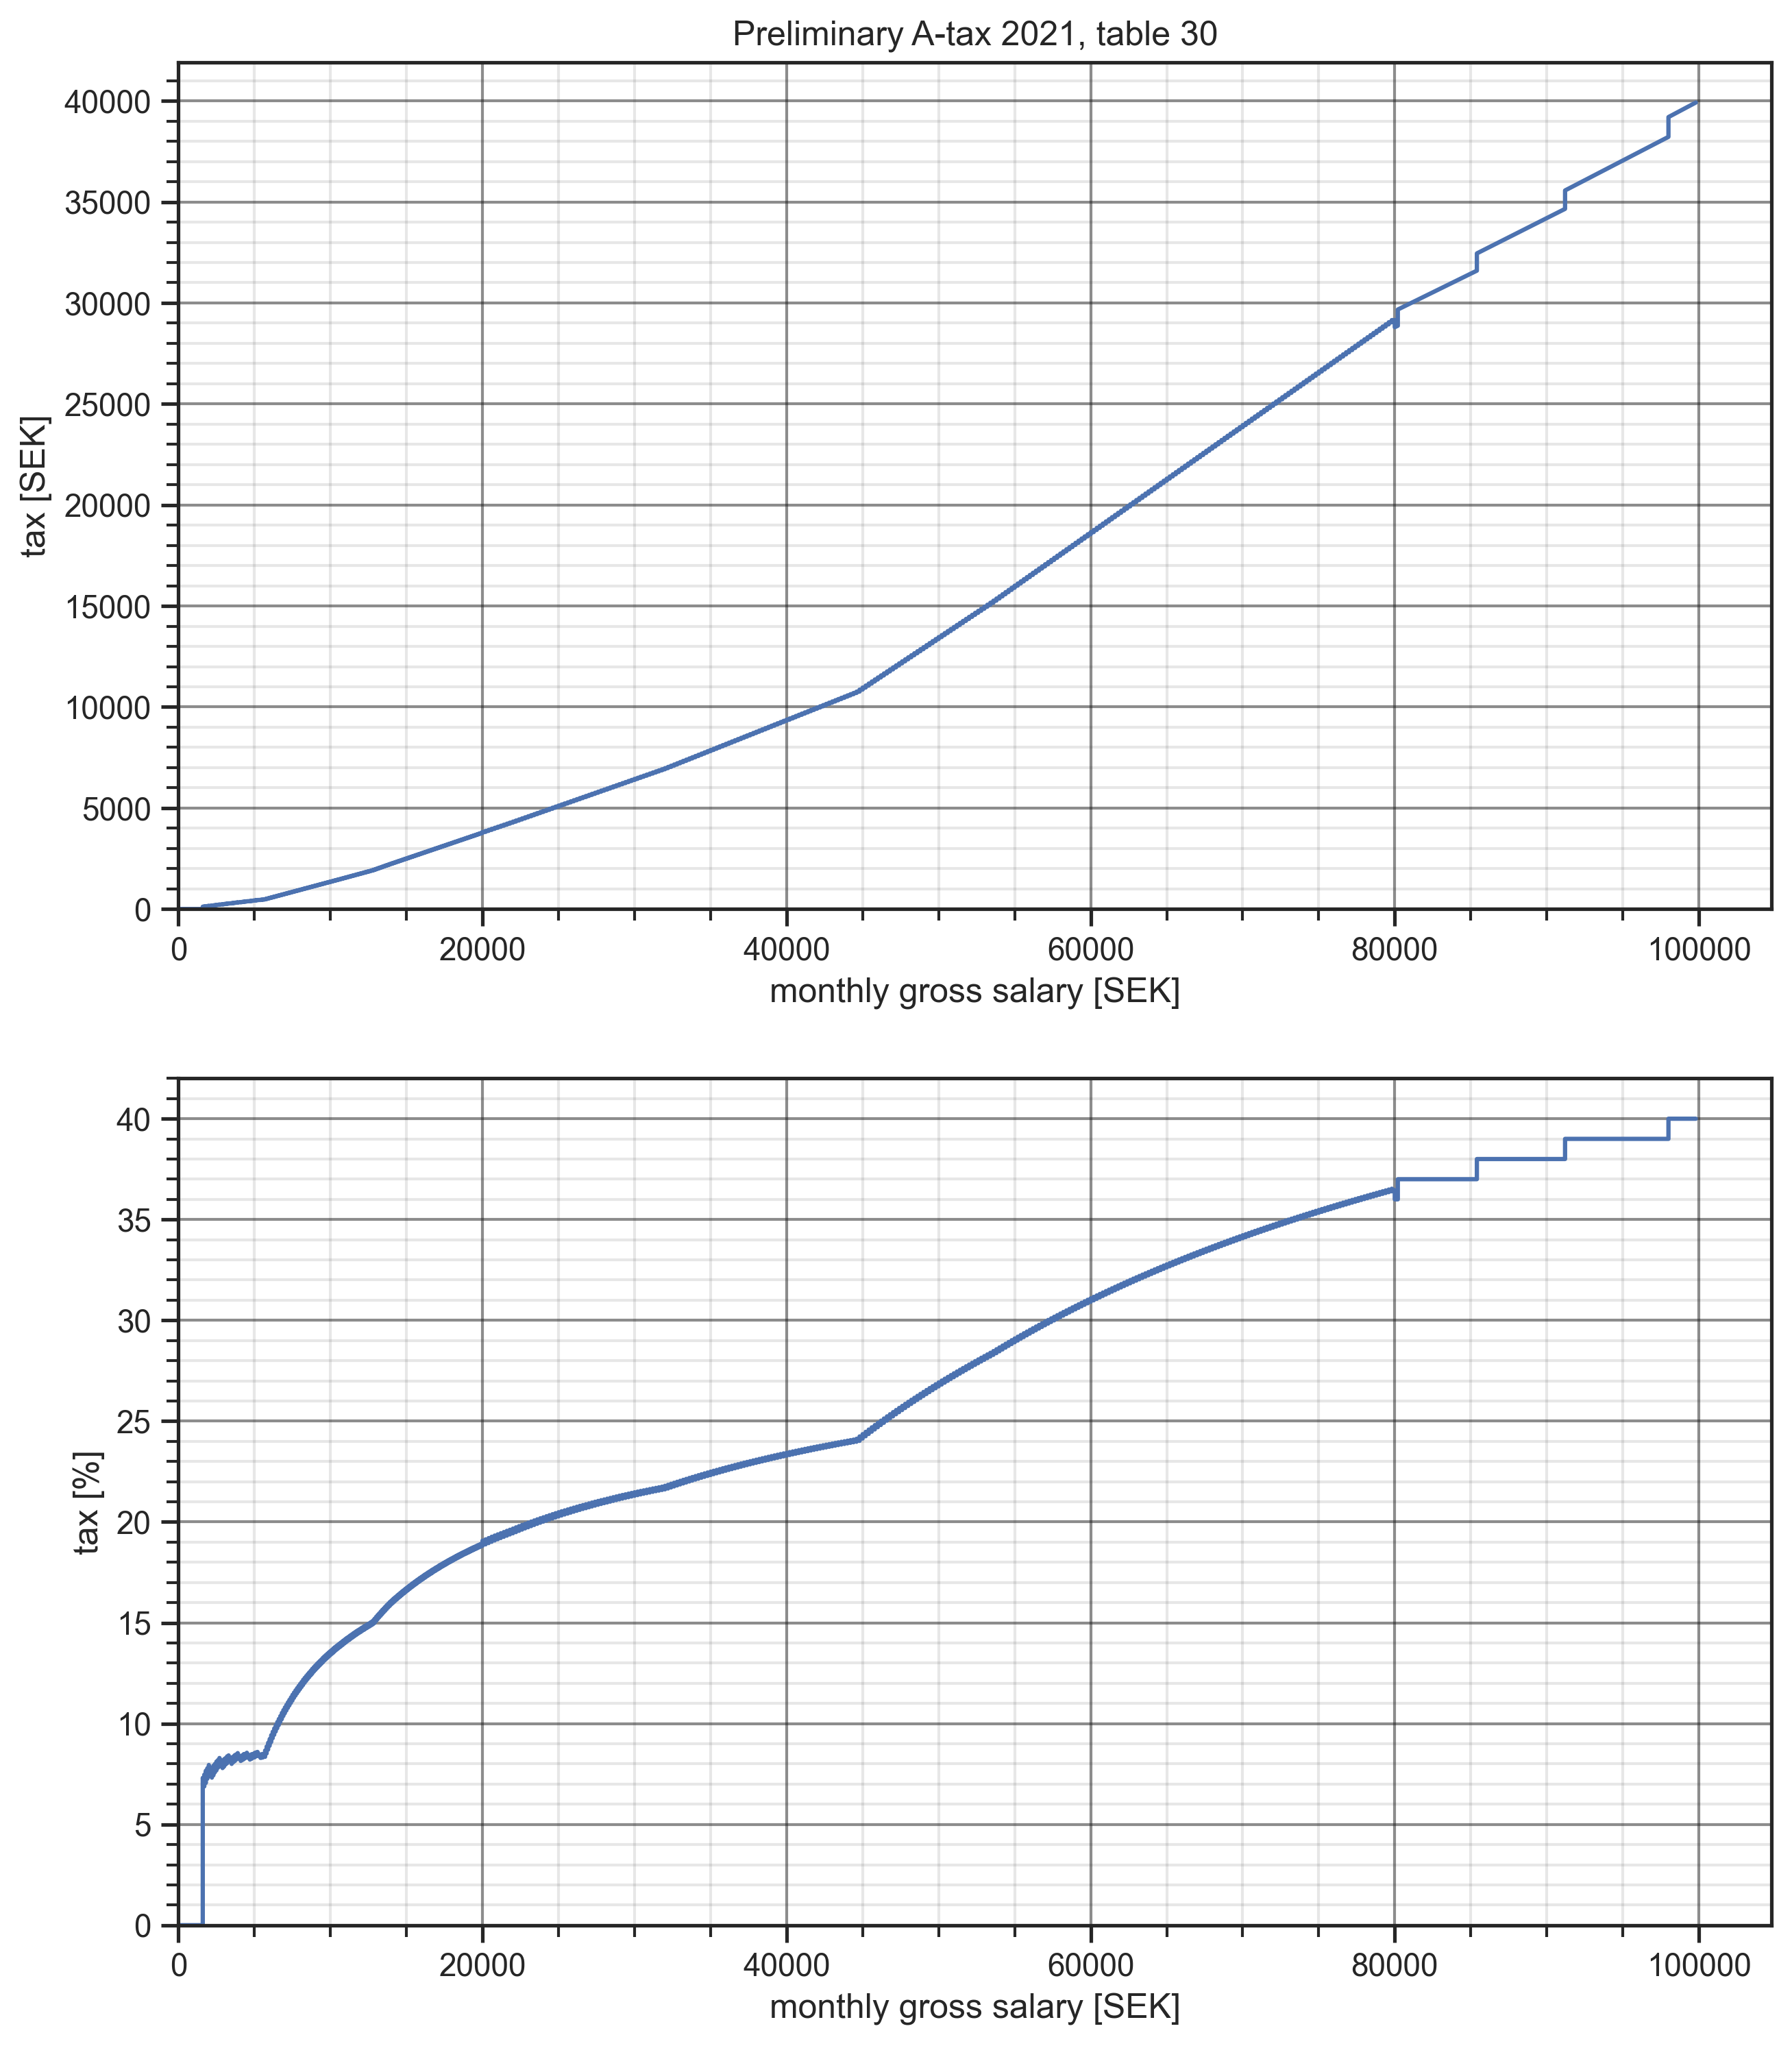

In [5]:
from atax import ATax
TAX_TABLE_NO = 30
MAX_SALARY = 100000
atax_table = ATax(TAX_TABLE_NO)
monthly_salary = list(filter(lambda e: e <= MAX_SALARY, atax_table.bounds))
atax = [atax_table.get(s) for s in monthly_salary]
atax_ratio = [atax_table.get(s) * 100.0 / s for s in monthly_salary]

plt.figure(figsize=(10, 12), facecolor='white')

plt.subplot(2,1,1)
plt.plot(monthly_salary, atax)
plt.title(f'Preliminary A-tax 2021, table {TAX_TABLE_NO}')
plt.xlabel('monthly gross salary [SEK]')
plt.ylabel('tax [SEK]')
plt.gca().set_ylim(ymin=0)
plt.gca().set_xlim(xmin=0)
plt.grid(visible=True, which='major', color='k', linestyle='-', alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.minorticks_on()

plt.subplot(2,1,2)
plt.plot(monthly_salary, atax_ratio)
plt.xlabel('monthly gross salary [SEK]')
plt.ylabel('tax [%]')
plt.gca().set_ylim(ymin=0)
plt.gca().set_xlim(xmin=0)
plt.grid(visible=True, which='major', color='k', linestyle='-', alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.minorticks_on()